# Segmentez des clients d'un site e-commerce - *Notebook essais*

In [54]:
import numpy as np

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
import scipy
from scipy import stats
import scipy.stats as st

import statsmodels
import statsmodels.api as sm
import missingno as msno

import sklearn

from sklearn.impute import KNNImputer
from category_encoders.ordinal import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from category_encoders import TargetEncoder

# pour le centrage et la réduction
from sklearn.preprocessing import StandardScaler
# pour l'ACP
from sklearn.decomposition import PCA

from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix

from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

from sklearn import datasets
from sklearn.cluster import KMeans

import timeit

# pour cartographie
import folium
import cartopy.crs as ccrs
import geopandas as gpd
import contextily as ctx

print("numpy version", np.__version__)
print("pandas version", pd.__version__)
print("matplotlib version", matplotlib.__version__)
print("seaborn version", sns.__version__)
print("scipy version", scipy.__version__)
print("statsmodels version", statsmodels.__version__)
print("missingno version", msno.__version__)

print("sklearn version", sklearn.__version__)

print("folium version", folium.__version__)

pd.options.display.max_rows = 200
pd.options.display.max_columns = 100

numpy version 1.26.4
pandas version 2.1.4
matplotlib version 3.8.0
seaborn version 0.13.2
scipy version 1.11.4
statsmodels version 0.14.0
missingno version 0.5.2
sklearn version 1.2.2
folium version 0.19.2


## Elaborer un modèle de clustering

Chargeons le dataset généré lors de l'exploration

In [35]:
# Charger le fichier de données
data = pd.read_csv("C:/Users/admin/Documents/Projets/Projet_5/data_projet/cleaned/data_olist_cleaned.csv", sep=',', low_memory=False)
data.head()

,latitude,longitude,nb_jours_anciennete,recence,frequence,montant,nb_jours_entre_chaque_commande,score_moyen,nb_notes
0,-23.333580,-46.823060,160,-0.718462,-5.199338,0.451469,160.273507,5.0,1.0
1,-23.545029,-46.781482,163,-0.680013,-5.199338,-1.738731,163.263090,4.0,1.0
2,-27.532246,-48.618667,585,1.798663,-5.199338,-0.265284,585.850868,3.0,1.0
3,-1.304189,-48.476339,369,0.567211,-5.199338,-1.295363,369.875428,4.0,1.0
4,-23.496567,-47.462811,336,0.426601,-5.199338,0.833781,336.905972,5.0,1.0


In [37]:
data.shape

(93358, 9)

### 1 - essai n°1 - features RFM avec K-means

Il s'agit ici d'utilser les 3 features RFM (recence, frequence et montant) pour un premier clustering avec l'algorithme k-means.

#### 1.1 - Filtrage des 3 features

In [48]:
X_1 = data[['recence', 'frequence', 'montant']].copy()
X_1.shape

(93358, 3)

In [50]:
X_1.describe()

,recence,frequence,montant
count,93358.000000,93358.000000,93358.000000
mean,-0.003585,-4.351068,-0.012323
std,1.007163,2.255672,1.001382
min,-5.199338,-5.199338,-5.199338
25%,-0.680013,-5.199338,-0.661162
50%,-0.003764,-5.199338,-0.003988
75%,0.675277,-5.199338,0.660209
max,5.199338,5.199338,5.199338


#### 1.2 - Test k-means

In [63]:
warnings.filterwarnings("ignore")

# Une liste vide pour enregistrer les inerties :  
intertia_list = [ ]

# Notre liste de nombres de clusters : 
k_list = range(1, 7)

# Pour chaque nombre de clusters : 
for k in k_list : 
    
    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k)
    
    # On entraine
    kmeans.fit(X_1)
    
    # On enregistre l'inertie obtenue : 
    intertia_list.append(kmeans.inertia_)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\clust

In [64]:
intertia_list

[663320.2584253206,
 186138.59891017873,
 133241.5899974134,
 98574.70320389072,
 82511.67455439472]

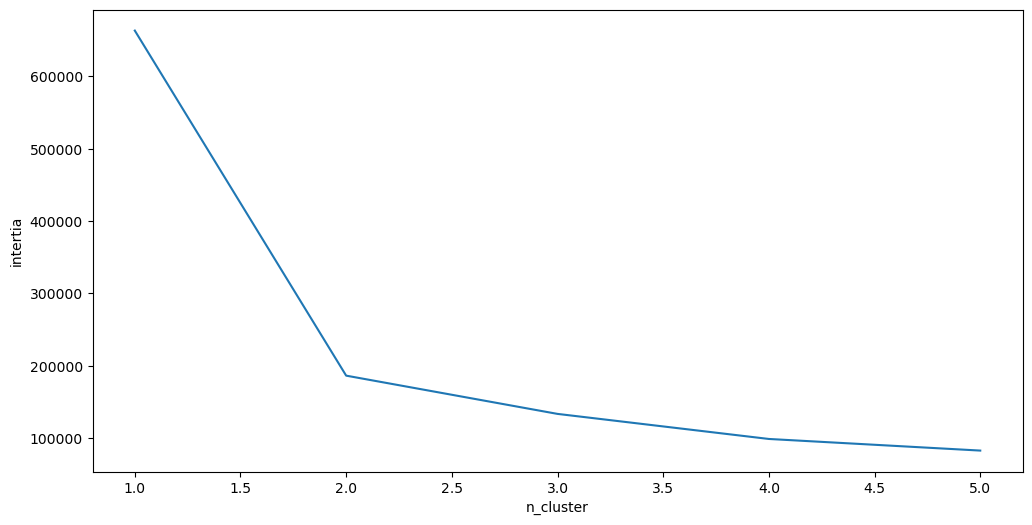

In [69]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")
ax = plt.plot(k_list, intertia_list)